# 🔮 Day 3 - Spell Solutions

This file contains solutions to all Day 3 spells and their practice challenges

---

## Spell 1: Loading Data Magic

This spell teaches basic data loading and exploration with `creatures_raw` from `creature_of_sky.csv`.

### Complete Solution Code:

In [ ]:
# set the locale to English and UTF-8 encoding so that emojis can be displayed correctly
Sys.setlocale("LC_CTYPE", "en_US.UTF-8")

In [2]:
# Load magical toolbox
library(dplyr)
print("✨ Toolbox loaded! Ready for data magic!")

# Load raw creatures data from our class
creatures_raw <- read.csv("../datasets/creatures_raw.csv")
print("🎉 Raw creatures data from our class loaded!")

# Look at first few rows
#print("👀 First peek at our raw creature data:")
#head(creatures_raw)



[1] "<U+2728> Toolbox loaded! Ready for data magic!"
[1] "<U+0001F389> Raw creatures data from our class loaded!"


In [3]:
# Look at last few rows
#print("👀 Last peek at our raw creature data:")
#tail(creatures_raw)


In [4]:
# Count our treasures
num_rows <- nrow(creatures_raw)
print(paste("🧙 Total number of creatures:", num_rows))

num_details <- ncol(creatures_raw)
print(paste("📋 Number of details per creature:", num_details))


[1] "<U+0001F9D9> Total number of creatures: 81"
[1] "<U+0001F4CB> Number of details per creature: 9"


In [5]:
# Show column names
print("📝 Columns in our raw creatures data:")
names(creatures_raw)

[1] "<U+0001F4DD> Columns in our raw creatures data:"


[1] "Timestamp"                                           
[2] "What.is.your.wizard.name."                           
[3] "What.is.your.magical.creature.s.name."               
[4] "What.type.of.creature.is.it."                        
[5] "How.old.is.your.creature..please.enter.number.only.."
[6] "On.a.scale.of.1.10..how.powerful.is.its.magic."      
[7] "Does.your.creature.have.wings."                      
[8] "What.is.its.primary.magical.element."                
[9] "What.superpower.does.this.creature.has."

---

## Spell 1B: Clean Creatures Data (Optional)

This spell cleans the raw form responses and creates a clean `creatures.csv` file.

### Complete Solution Code:

In [6]:
# Load raw data
raw <- read.csv("../datasets/creatures_raw.csv", stringsAsFactors = FALSE)

# Rename columns to simple, consistent names
clean_names <- raw %>%
  rename(
    wizard_name = What.is.your.wizard.name.,
    creature_name = What.is.your.magical.creature.s.name.,
    creature_type = What.type.of.creature.is.it.,
    creature_age_raw = How.old.is.your.creature..please.enter.number.only..,
    magic_power_raw = On.a.scale.of.1.10..how.powerful.is.its.magic.,
    has_wings_raw = Does.your.creature.have.wings.,
    element = What.is.its.primary.magical.element.,
    superpower = What.superpower.does.this.creature.has.
  )

# Clean and convert data types
cleaned <- clean_names %>%
  mutate(
    creature_name = tolower(trimws(as.character(creature_name))),
    creature_name = ifelse(is.na(creature_name) | creature_name == "", NA, creature_name),
    
    creature_type = tolower(trimws(as.character(creature_type))),
    creature_type = ifelse(is.na(creature_type) | creature_type == "", NA, creature_type),
    
    # Age: coerce to number, drop invalid ages
    creature_age = suppressWarnings(as.numeric(gsub("[^0-9\\-]", "", creature_age_raw))),
    creature_age = ifelse(is.na(creature_age) | creature_age < 0 | creature_age > 1000, NA, creature_age),
    
    # Magic power: coerce to 1-10 range
    magic_power = suppressWarnings(as.numeric(gsub("[^0-9]", "", magic_power_raw))),
    magic_power = ifelse(is.na(magic_power), NA, pmin(pmax(magic_power, 1), 10)),
    
    # Wings: normalize to Yes/No
    has_wings = tolower(trimws(as.character(has_wings_raw))),
    has_wings = ifelse(has_wings %in% c("yes", "y", "true", "1"), "yes",
                 ifelse(has_wings %in% c("no", "n", "false", "0"), "no", NA)),
    
    element = tolower(trimws(as.character(element))),
    wizard_name = tolower(trimws(as.character(wizard_name))),
    superpower = tolower(trimws(as.character(superpower)))
  ) %>%
  select(
    wizard_name, creature_name, creature_type, creature_age,
    magic_power, has_wings, element, superpower
  )

# Remove rows with missing essentials
before_n <- nrow(cleaned)
cleaned <- cleaned %>%
  filter(!is.na(creature_name),
         !is.na(creature_type),
         !is.na(creature_age),
         !is.na(magic_power))
after_n <- nrow(cleaned)
removed_n <- before_n - after_n

print(paste("✅ Kept", after_n, "clean rows; removed", removed_n, "rows with bad/missing values"))

# Save the clean dataset
#write.csv(cleaned, "../datasets/creatures.csv", row.names = FALSE)
#print("💾 Saved clean data to datasets/creatures.csv")
#print(head(cleaned, 3))

[1] "<U+2705> Kept 56 clean rows; removed 25 rows with bad/missing values"


---

## Spell 2: Select and Filter Magic

This spell teaches `select()` and `filter()` functions with 3 practice challenges.

### Main Examples:

In [7]:
# Load cleaned data
library(dplyr)
creature_data <- read.csv("../datasets/creatures.csv")
print("🎉 Creatures data loaded! Ready to wrangle!")

# SELECT example - choose specific columns
selected_data <- select(creature_data, creature_name, creature_type)
print("🎯 Selected only names and types:")
print(selected_data)


[1] "<U+0001F389> Creatures data loaded! Ready to wrangle!"
[1] "<U+0001F3AF> Selected only names and types:"
              creature_name creature_type
1                     alita         fairy
2                     stark        goblin
3                   queenie       phoenix
4                     alita         fairy
5                  penguino      seahorse
6                john fairy         fairy
7         clash royal golem         golem
8                      pepy         golem
9                     nixie       phoenix
10                     rock         golem
11                  peaches       unicorn
12                 guy mann         elves
13                magic_owl           owl
14                    mushu        dragon
15                 gigachad         elves
16                    billy        dragon
17               iron golem         golem
18                  phantom       phoenix
19                 cerebrum           owl
20                    draco        dragon
21      

In [8]:
# FILTER example - keep only certain rows
dragons_only <- filter(creature_data, creature_type == "dragon")
print("🐉 Only dragons:")
print(dragons_only)



[1] "<U+0001F409> Only dragons:"
            wizard_name creature_name creature_type creature_age magic_power
1             addie_ :)         mushu        dragon            2           7
2 oakwoodwizardthethird         billy        dragon          131          10
3                adrian         draco        dragon            3          10
4           joe bonkers   john dragon        dragon            1           8
5       wizard wardrobe       inferno        dragon           35           9
6    thats_un-important   marshmellow        dragon          200           9
  has_wings element
1       yes    fire
2       yes     air
3       yes     air
4       yes    fire
5       yes    fire
6       yes    fire
                                                                                                                                                                           superpower
1                                                                                                         

In [10]:
young_creatures <- filter(creature_data, creature_age < 50)
print("👶 Only young creatures:")
print(young_creatures[, c("creature_name", "creature_age")])

[1] "<U+0001F476> Only young creatures:"
              creature_name creature_age
1                     stark            2
2                   queenie           12
3                     alita            7
4                  penguino            9
5                      pepy            1
6                     nixie            8
7                   peaches            9
8                  guy mann           45
9                     mushu            2
10                  phantom           15
11                    draco            3
12                    sigma            1
13                 ice wolf           12
14              john dragon            1
15           sweet_dumb_guy           15
16                 anonymus            0
17             john unicorn            1
18                  inferno           35
19         yao - atron 3000           25
20                  kent.jr            6
21                 creature            2
22       yao - atron 3000 b           25
23             b

In [11]:
# Combine SELECT and FILTER
powerful_creatures <- creature_data %>%
  filter(magic_power > 8) %>%
  select(creature_name, magic_power)
print("⚡ Powerful creatures and their magic levels:")
print(powerful_creatures)

[1] "<U+26A1> Powerful creatures and their magic levels:"
              creature_name magic_power
1                     alita          10
2                   queenie           9
3                     alita          10
4                  penguino          10
5                john fairy          10
6         clash royal golem          10
7                      rock           9
8                   peaches          10
9                 magic_owl           9
10                 gigachad          10
11                    billy          10
12               iron golem          10
13                 cerebrum          10
14                    draco          10
15         aquila phoenicus          10
16                   soleil          10
17                   firenz          10
18                  inferno           9
19                 creature          10
20             butter toast          10
21 chester "cheesy" chiller           9
22                  idk_bro          10
23                   j

### Challenge Solutions:

**Challenge 1: Select only creature_name and creature_age**

In [12]:
challenge1 <- select(creature_data, creature_name, creature_age)
print("Challenge 1 - Selected names and ages:")
print(challenge1)

[1] "Challenge 1 - Selected names and ages:"
              creature_name creature_age
1                     alita          100
2                     stark            2
3                   queenie           12
4                     alita            7
5                  penguino            9
6                john fairy          990
7         clash royal golem          200
8                      pepy            1
9                     nixie            8
10                     rock          500
11                  peaches            9
12                 guy mann           45
13                magic_owl          100
14                    mushu            2
15                 gigachad           69
16                    billy          131
17               iron golem          950
18                  phantom           15
19                 cerebrum         1000
20                    draco            3
21                    sigma            1
22                 ice wolf           12
23         a

**Challenge 2: Filter for creatures older than 100 years**

In [14]:
challenge2 <- filter(creature_data, creature_age > 100)
print("Challenge 2 - Old creatures (age > 100):")
print(challenge2[, c("creature_name", "creature_age")])

[1] "Challenge 2 - Old creatures (age > 100):"
       creature_name creature_age
1         john fairy          990
2  clash royal golem          200
3               rock          500
4              billy          131
5         iron golem          950
6           cerebrum         1000
7   aquila phoenicus          512
8             soleil          500
9             firenz          200
10       marshmellow          200
11             siren          250


**Challenge 3: Find dragons and show only their names**

In [15]:
challenge3 <- creature_data %>%
  filter(creature_type == "dragon") %>%
  select(creature_name)
print("Challenge 3 - Dragon names only:")
print(challenge3)

[1] "Challenge 3 - Dragon names only:"
  creature_name
1         mushu
2         billy
3         draco
4   john dragon
5       inferno
6   marshmellow


---

## Spell 3: Grouping and Counting Magic

This spell teaches `group_by()`, `summarize()`, and `mutate()` functions with 2 practice challenges.

### Main Examples:

In [16]:
# GROUP BY and count example
creature_counts <- creature_data %>%
  group_by(creature_type) %>%
  summarize(count = n())
print("📊 How many of each creature type:")
print(creature_counts)


[1] "<U+0001F4CA> How many of each creature type:"


# A tibble: 12 x 2
   creature_type count
   <chr>         <int>
 1 dragon            6
 2 elves             4
 3 fairy             4
 4 goblin            5
 5 golem             8
 6 griffin           1
 7 mermaid           1
 8 owl               3
 9 phoenix          10
10 seahorse          4
11 unicorn           4
12 werewolf          6


In [19]:
# MUTATE example - add new information
creatures_with_category <- mutate(creature_data,
                                 power_category = ifelse(magic_power >= 8, "high", "low"))
print("⚡ Creatures with power category:")
print(creatures_with_category[, c("creature_name", "power_category")])


[1] "<U+26A1> Creatures with power category:"
              creature_name power_category
1                     alita           high
2                     stark            low
3                   queenie           high
4                     alita           high
5                  penguino           high
6                john fairy           high
7         clash royal golem           high
8                      pepy            low
9                     nixie            low
10                     rock           high
11                  peaches           high
12                 guy mann            low
13                magic_owl           high
14                    mushu            low
15                 gigachad           high
16                    billy           high
17               iron golem           high
18                  phantom           high
19                 cerebrum           high
20                    draco           high
21                    sigma            low
22      

In [20]:
# Find average magic level for each creature type
magic_by_type <- creature_data %>%
  group_by(creature_type) %>%
  summarize(average_magic = mean(magic_power))
print("⚡ Average magic by creature type:")
print(magic_by_type)

[1] "<U+26A1> Average magic by creature type:"
# A tibble: 12 x 2
   creature_type average_magic
   <chr>                 <dbl>
 1 dragon                 8.83
 2 elves                  3.25
 3 fairy                 10   
 4 goblin                 5   
 5 golem                  7.25
 6 griffin                6   
 7 mermaid               10   
 8 owl                    6.67
 9 phoenix                7.3 
10 seahorse               4.75
11 unicorn                7.5 
12 werewolf               4.67


### Challenge Solutions:

**Challenge 1: Create age_group column**

In [22]:
creatures_with_age_group <- mutate(creature_data, 
                                   age_group = ifelse(creature_age > 100, "Old", "Young"))
print("Challenge 1 - Creatures with age groups:")
print(creatures_with_age_group[, c("creature_name", "age_group")])

[1] "Challenge 1 - Creatures with age groups:"
              creature_name age_group
1                     alita     Young
2                     stark     Young
3                   queenie     Young
4                     alita     Young
5                  penguino     Young
6                john fairy       Old
7         clash royal golem       Old
8                      pepy     Young
9                     nixie     Young
10                     rock       Old
11                  peaches     Young
12                 guy mann     Young
13                magic_owl     Young
14                    mushu     Young
15                 gigachad     Young
16                    billy       Old
17               iron golem       Old
18                  phantom     Young
19                 cerebrum       Old
20                    draco     Young
21                    sigma     Young
22                 ice wolf     Young
23         aquila phoenicus       Old
24              john dragon     Young
25 

**Challenge 2: Group by age_group and count**

In [23]:
age_counts <- creatures_with_age_group %>%
  group_by(age_group) %>%
  summarize(count = n())
print("Challenge 2 - Count by age group:")
print(age_counts)

[1] "Challenge 2 - Count by age group:"


# A tibble: 2 x 2
  age_group count
  <chr>     <int>
1 Old          11
2 Young        45


---

## Spell 4: Pipeline Magic

This spell teaches the `%>%` operator for chaining operations with 1 practice challenge.

### Main Examples:

In [24]:
# The Old Way (messy!)
print("😵 The messy old way:")
step1 <- filter(creature_data, creature_age > 50)
step2 <- select(step1, creature_name, creature_type, magic_power)
step3 <- arrange(step2, magic_power)
print("Final result from messy way:")
print(step3)


[1] "<U+0001F635> The messy old way:"
[1] "Final result from messy way:"
       creature_name creature_type magic_power
1               rock         golem           9
2          magic_owl           owl           9
3        marshmellow        dragon           9
4              alita         fairy          10
5         john fairy         fairy          10
6  clash royal golem         golem          10
7           gigachad         elves          10
8              billy        dragon          10
9         iron golem         golem          10
10          cerebrum           owl          10
11  aquila phoenicus       phoenix          10
12            soleil       phoenix          10
13            firenz       phoenix          10
14           idk_bro       unicorn          10
15             siren       mermaid          10


In [25]:
# The Magic Pipeline Way!
print("✨ The magical pipeline way:")
magic_result <- creature_data %>%
  filter(creature_age > 50) %>%
  select(creature_name, creature_type, magic_power) %>%
  arrange(magic_power)
print("Same result but much cleaner:")
print(magic_result)


[1] "<U+2728> The magical pipeline way:"
[1] "Same result but much cleaner:"
       creature_name creature_type magic_power
1               rock         golem           9
2          magic_owl           owl           9
3        marshmellow        dragon           9
4              alita         fairy          10
5         john fairy         fairy          10
6  clash royal golem         golem          10
7           gigachad         elves          10
8              billy        dragon          10
9         iron golem         golem          10
10          cerebrum           owl          10
11  aquila phoenicus       phoenix          10
12            soleil       phoenix          10
13            firenz       phoenix          10
14           idk_bro       unicorn          10
15             siren       mermaid          10


In [26]:
# Find the most magical young creatures
young_and_magical <- creature_data %>%
  filter(creature_age < 100) %>%          # Keep young creatures
  filter(magic_power > 8) %>%             # Keep magical ones
  select(creature_name, creature_age, magic_power) %>%  # Pick important info
  arrange(desc(magic_power))              # Sort by magic (highest first)
print("🌟 Young and magical creatures:")
print(young_and_magical)


[1] "<U+0001F31F> Young and magical creatures:"
              creature_name creature_age magic_power
1                     alita            7          10
2                  penguino            9          10
3                   peaches            9          10
4                  gigachad           69          10
5                     draco            3          10
6                  creature            2          10
7              butter toast            7          10
8                    jrking           12          10
9               the faliuer           22          10
10                  queenie           12           9
11                  inferno           35           9
12 chester "cheesy" chiller            9           9
13                    mr jr            8           9


In [27]:
# Count creatures by type using pipeline
type_counts <- creature_data %>%
  group_by(creature_type) %>%
  summarize(count = n()) %>%
  arrange(desc(count))  # Most common types first
print("Creature types from most to least common:")
print(type_counts)

[1] "Creature types from most to least common:"
# A tibble: 12 x 2
   creature_type count
   <chr>         <int>
 1 phoenix          10
 2 golem             8
 3 dragon            6
 4 werewolf          6
 5 goblin            5
 6 elves             4
 7 fairy             4
 8 seahorse          4
 9 unicorn           4
10 owl               3
11 griffin           1
12 mermaid           1


### Challenge Solution:

**Challenge: Pipeline that filters for magic_power > 8, selects name and type, arranges by name alphabetically**

In [28]:
challenge_result <- creature_data %>%
  filter(magic_power > 8) %>%
  select(creature_name, creature_type) %>%
  arrange(creature_name)
print("Challenge - Powerful creatures alphabetically:")
print(challenge_result)

[1] "Challenge - Powerful creatures alphabetically:"
              creature_name creature_type
1                     alita         fairy
2                     alita         fairy
3          aquila phoenicus       phoenix
4                     billy        dragon
5              butter toast         fairy
6                  cerebrum           owl
7  chester "cheesy" chiller       unicorn
8         clash royal golem         golem
9                  creature       phoenix
10                    draco        dragon
11                   firenz       phoenix
12                 gigachad         elves
13                  idk_bro       unicorn
14                  inferno        dragon
15               iron golem         golem
16               john fairy         fairy
17                   jrking      werewolf
18                magic_owl           owl
19              marshmellow        dragon
20                    mr jr         golem
21                  peaches       unicorn
22                 peng

---

## Spell 5: Histogram Magic

This spell teaches creating histograms with `ggplot2` with 1 practice challenge.

### Main Examples:

Warning message:
"package 'ggplot2' was built under R version 4.3.3"


[1] "<U+0001F3A8> Ready to paint with creature data!"
[1] "<U+0001F50D> Let's explore creature ages:"
 [1]  100    2   12    7    9  990  200    1    8  500    9   45  100    2   69
[16]  131  950   15 1000    3    1   12  512    1   15  500  200    0    1   35
[31]   25    6    2   25    7    1    9  100   12    1    1    3  200    6    1
[46]    0   22    8  250    1    1    1    1    1    1    1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


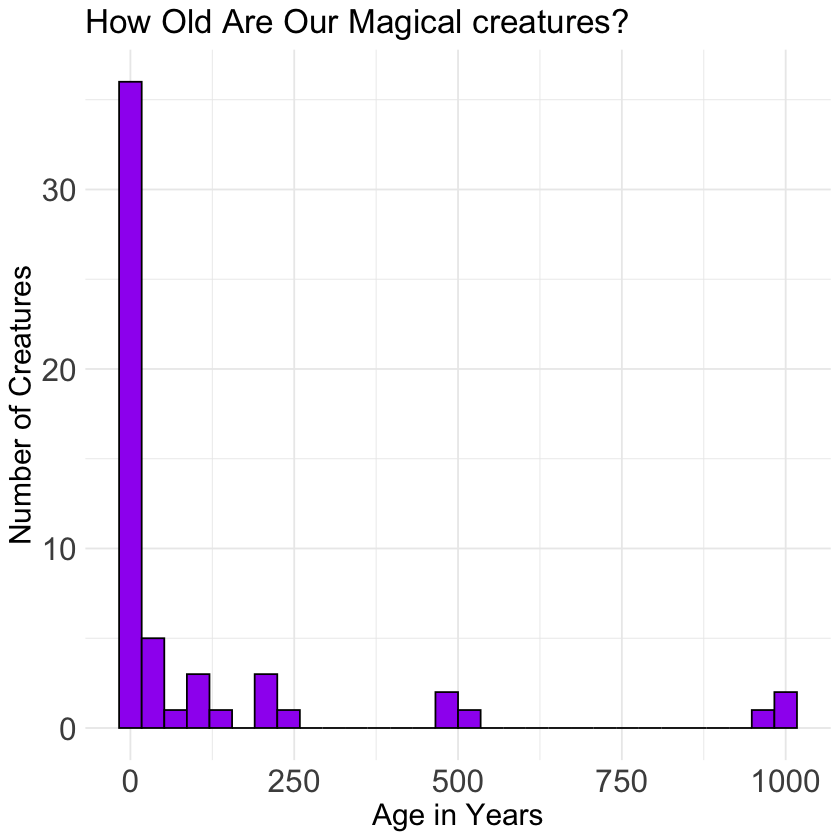

In [29]:
library(ggplot2)
print("🎨 Ready to paint with creature data!")

# Explore creature ages
print("🔍 Let's explore creature ages:")
print(creature_data$creature_age)

# Create histogram of creature ages
age_histogram <- ggplot(creature_data, aes(x = creature_age)) +
  geom_histogram(fill = "purple", color = "black") +
  labs(title = "How Old Are Our Magical creatures?",
       x = "Age in Years",
       y = "Number of Creatures") +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(age_histogram)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


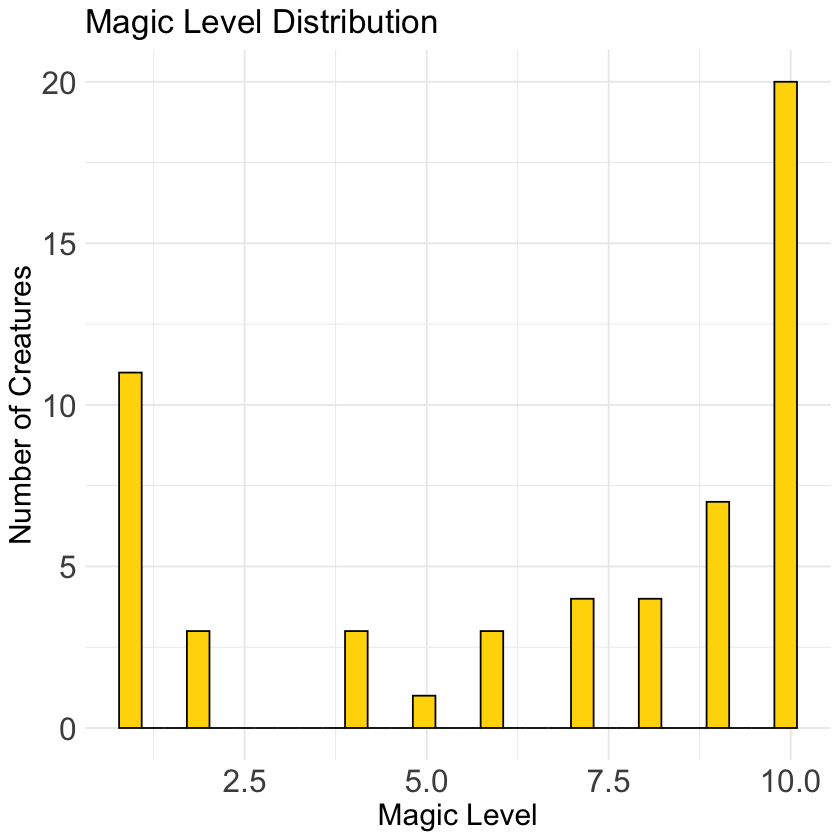

In [30]:
# Look at magic levels
magic_histogram <- ggplot(creature_data, aes(x = magic_power)) +
  geom_histogram(fill = "gold", color = "black") +
  labs(title = "Magic Level Distribution",
       x = "Magic Level",
       y = "Number of Creatures")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(magic_histogram)


### Challenge 1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


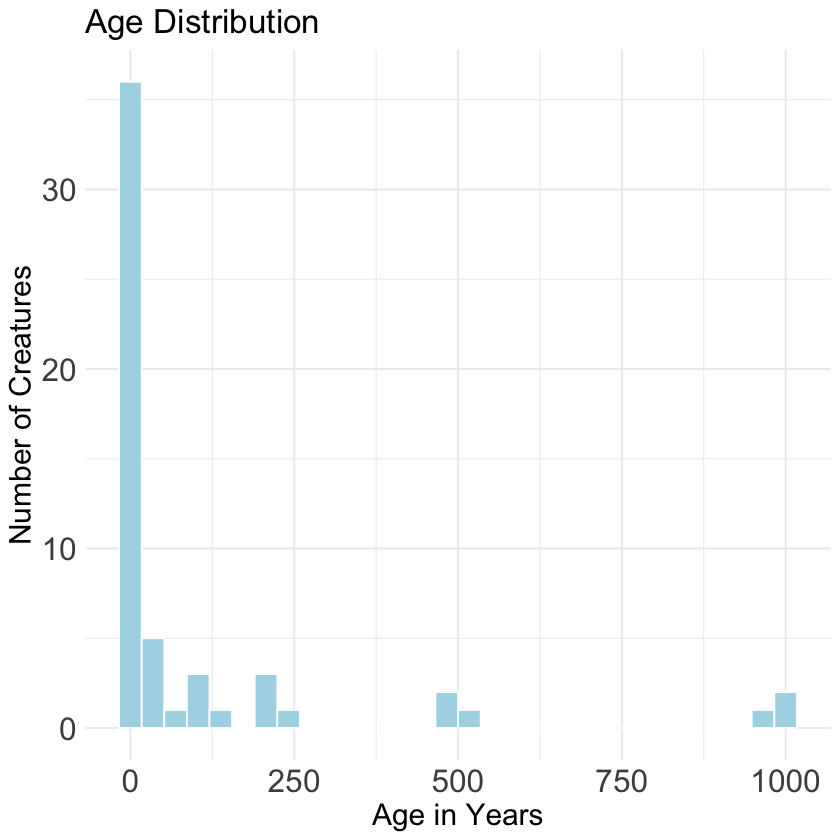

In [35]:
my_histogram <- ggplot(creature_data, aes(x = creature_age)) +
  geom_histogram(fill = "lightblue",color = "white") +
  labs(title = "Age Distribution",
       x = "Age in Years",
       y = "Number of Creatures")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))


my_histogram

---

## Spell 6: Scatter Plot Magic

This spell teaches creating scatter plots to explore relationships with 1 practice challenge.

### Main Examples:

[1] "<U+0001F440> Let's see if age and magic are related:"
[1] "Age vs Magic Level for each creature:"
              creature_name creature_age magic_power
1                     alita          100          10
2                     stark            2           7
3                   queenie           12           9
4                     alita            7          10
5                  penguino            9          10
6                john fairy          990          10
7         clash royal golem          200          10
8                      pepy            1           1
9                     nixie            8           7
10                     rock          500           9
11                  peaches            9          10
12                 guy mann           45           1
13                magic_owl          100           9
14                    mushu            2           7
15                 gigachad           69          10
16                    billy          131         

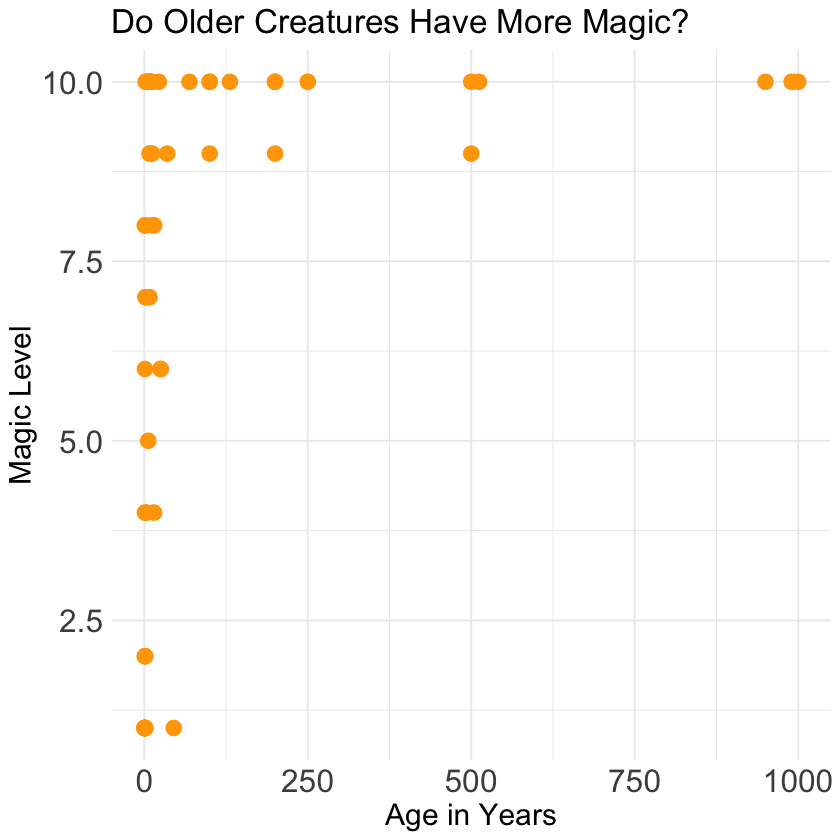

In [36]:
# Show age vs magic data
print("👀 Let's see if age and magic are related:")
print("Age vs Magic Level for each creature:")
print(select(creature_data, creature_name, creature_age, magic_power))

# Create first scatter plot
age_vs_magic <- ggplot(creature_data, aes(x = creature_age, y = magic_power)) +
  geom_point(size = 4, color = "orange") +
  labs(title = "Do Older Creatures Have More Magic?",
       x = "Age in Years",
       y = "Magic Level")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(age_vs_magic)


### Challenge Solution:

**Challenge: Create scatter plot with creature_age on x-axis, magic_power on y-axis, colored by creature_type**

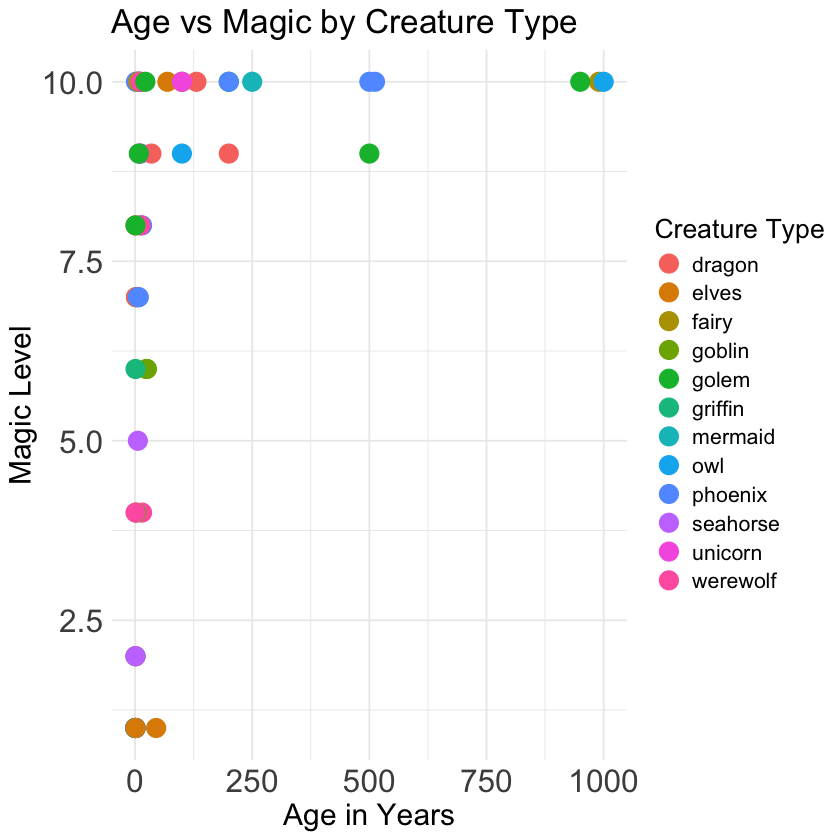

In [37]:
colorful_scatter <- ggplot(creature_data, aes(x = creature_age, y = magic_power, color = creature_type)) +
  geom_point(size = 5) +
  labs(title = "Age vs Magic by Creature Type",
       x = "Age in Years",
       y = "Magic Level",
       color = "Creature Type")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(colorful_scatter)

---

## Spell 7: Bar Chart Magic

This spell teaches creating bar charts for comparisons with 1 practice challenge.

### Main Examples:

In [38]:
print("🏆 Ready for the creature competition!")

# Show creature type counts
print("🎯 Let's count our creature types:")
print(table(creature_data$creature_type))



[1] "<U+0001F3C6> Ready for the creature competition!"
[1] "<U+0001F3AF> Let's count our creature types:"

  dragon    elves    fairy   goblin    golem  griffin  mermaid      owl 
       6        4        4        5        8        1        1        3 
 phoenix seahorse  unicorn werewolf 
      10        4        4        6 


In [39]:
# Count how many of each creature type
creature_counts <- creature_data %>%
  group_by(creature_type) %>%
  summarize(total = n())
print("📊 Creature type counts:")
print(creature_counts)


[1] "<U+0001F4CA> Creature type counts:"
# A tibble: 12 x 2
   creature_type total
   <chr>         <int>
 1 dragon            6
 2 elves             4
 3 fairy             4
 4 goblin            5
 5 golem             8
 6 griffin           1
 7 mermaid           1
 8 owl               3
 9 phoenix          10
10 seahorse          4
11 unicorn           4
12 werewolf          6


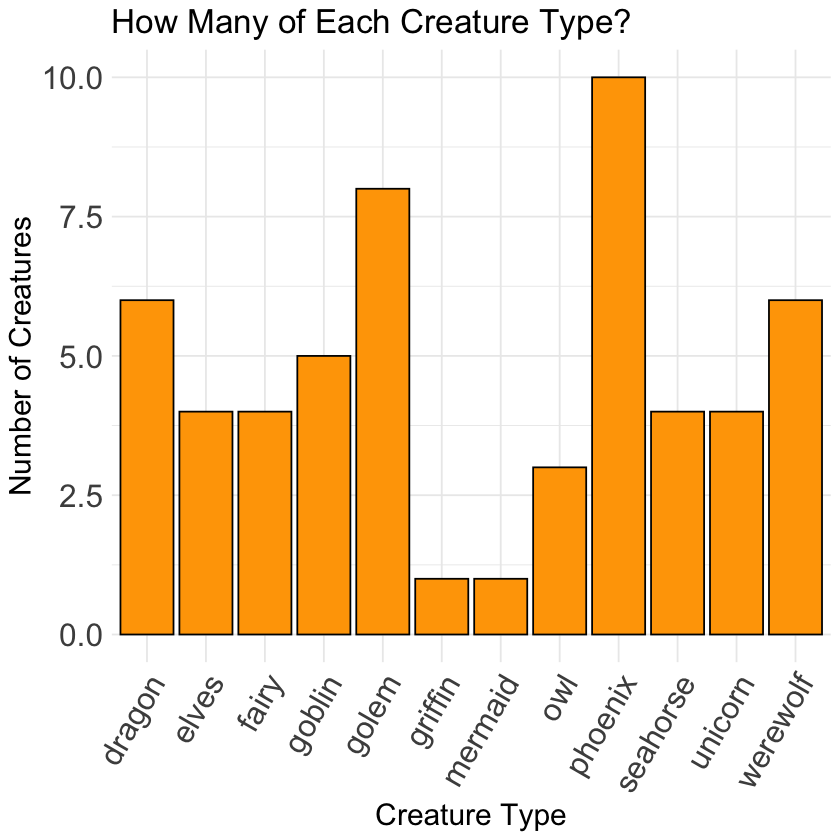

In [42]:
# Make the bar chart
creature_bar_chart <- ggplot(creature_counts, aes(x = creature_type, y = total)) +
  geom_col(fill = "orange", color = "black") +
  labs(title = "How Many of Each Creature Type?",
       x = "Creature Type",
       y = "Number of Creatures")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(creature_bar_chart)


[1] "<U+26A1> Average magic by creature type:"


# A tibble: 12 x 2
   creature_type average_magic
   <chr>                 <dbl>
 1 dragon                 8.83
 2 elves                  3.25
 3 fairy                 10   
 4 goblin                 5   
 5 golem                  7.25
 6 griffin                6   
 7 mermaid               10   
 8 owl                    6.67
 9 phoenix                7.3 
10 seahorse               4.75
11 unicorn                7.5 
12 werewolf               4.67


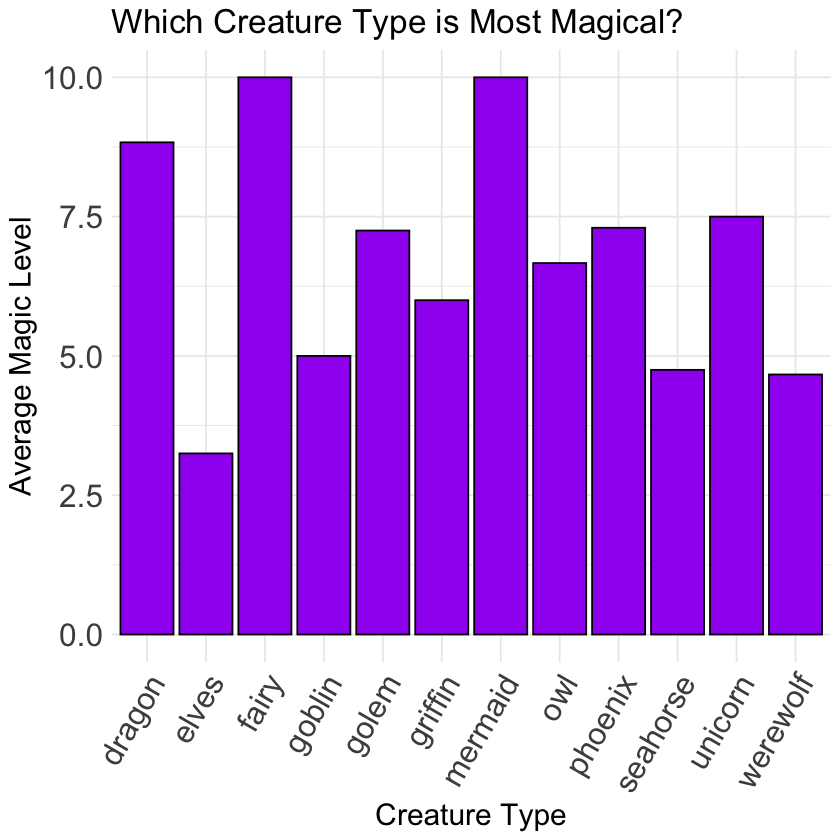

In [44]:
# Compare average magic levels
magic_by_type <- creature_data %>%
  group_by(creature_type) %>%
  summarize(average_magic = mean(magic_power))
print("⚡ Average magic by creature type:")
print(magic_by_type)

magic_bar_chart <- ggplot(magic_by_type, aes(x = creature_type, y = average_magic)) +
  geom_col(fill = "purple", color = "black") +
  labs(title = "Which Creature Type is Most Magical?",
       x = "Creature Type",
       y = "Average Magic Level")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(magic_bar_chart)

### Challenge Solution:

**Challenge: Create bar chart showing average age for each creature type**

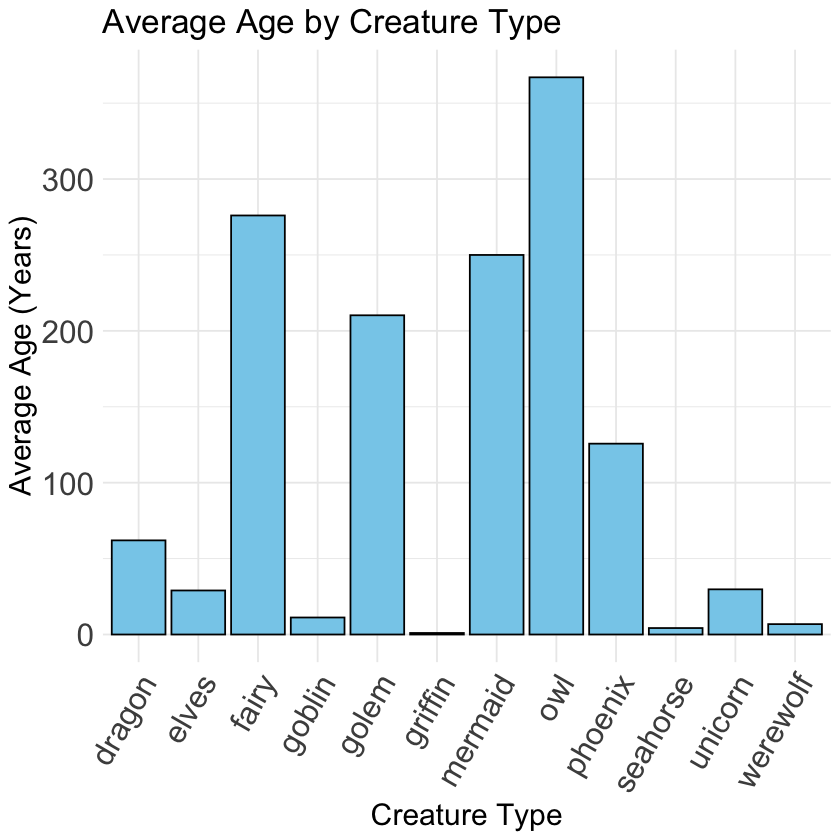

In [46]:
age_totals <- creature_data %>%
  group_by(creature_type) %>%
  summarize(average_age = mean(creature_age))

age_bar_chart <- ggplot(age_totals, aes(x = creature_type, y = average_age)) +
  geom_col(fill = "skyblue", color = "black") +
  labs(title = "Average Age by Creature Type",
       x = "Creature Type",
       y = "Average Age (Years)")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(age_bar_chart)

---

## Spell 8: Team Data Detective Project (Overview)

This is the overview spell that introduces the team project concept.

### Complete Solution Code:

---

## Spell 8A: Team Project - Creatures Mystery

This project uses `creatures.csv` and has 4 questions plus 2 challenges.

### Setup:

In [48]:
# Load tools and data
library(dplyr)
library(ggplot2)
creature_data <- read.csv("../datasets/creatures.csv")
#print("🔍 Evidence loaded from creatures.csv")
#head(creature_data)

### Question 1: Which creature type has the highest average magic power?

# A tibble: 12 x 2
   creature_type average_magic
   <chr>                 <dbl>
 1 fairy                 10   
 2 mermaid               10   
 3 dragon                 8.83
 4 unicorn                7.5 
 5 phoenix                7.3 
 6 golem                  7.25
 7 owl                    6.67
 8 griffin                6   
 9 goblin                 5   
10 seahorse               4.75
11 werewolf               4.67
12 elves                  3.25


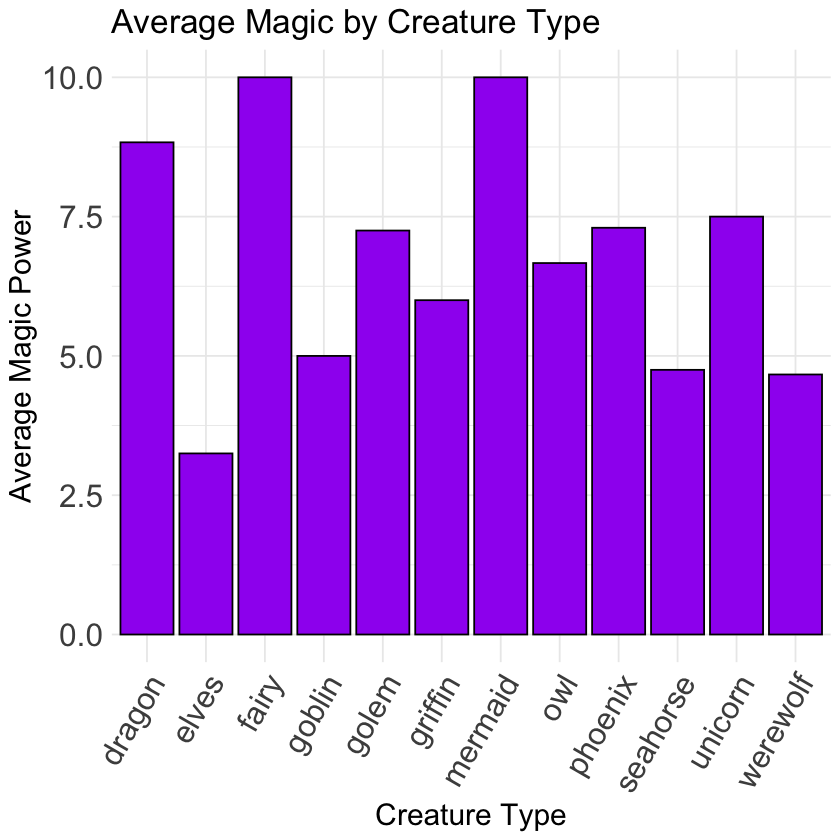

In [50]:
# Average magic by creature type
avg_magic_by_type <- creature_data %>%
  group_by(creature_type) %>%
  summarize(average_magic = mean(magic_power)) %>%
  arrange(desc(average_magic))
print(avg_magic_by_type)

avg_magic_plot <- ggplot(avg_magic_by_type, aes(x = creature_type, y = average_magic)) +
  geom_col(fill = "purple", color = "black") +
  labs(title = "Average Magic by Creature Type",
       x = "Creature Type", y = "Average Magic Power")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(avg_magic_plot)

### Question 2: Do winged creatures tend to be more powerful?

# A tibble: 2 x 3
  has_wings average_magic count
  <chr>             <dbl> <int>
1 no                 4.93    28
2 yes                8.46    28


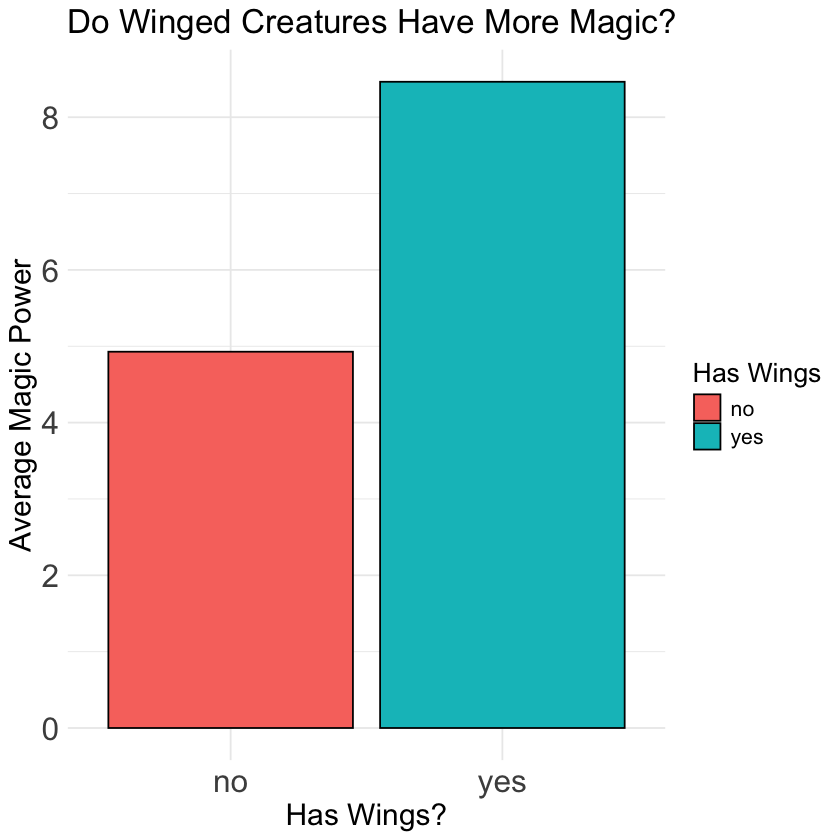

In [52]:
# Compare winged vs non-winged
winged_compare <- creature_data %>%
  group_by(has_wings) %>%
  summarize(average_magic = mean(magic_power), count = n())
print(winged_compare)

winged_plot <- ggplot(winged_compare, aes(x = has_wings, y = average_magic, fill = has_wings)) +
  geom_col(color = "black") +
  labs(title = "Do Winged Creatures Have More Magic?",
       x = "Has Wings?", y = "Average Magic Power", fill = "Has Wings")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(winged_plot)

### Question 3: Are older creatures more magical?

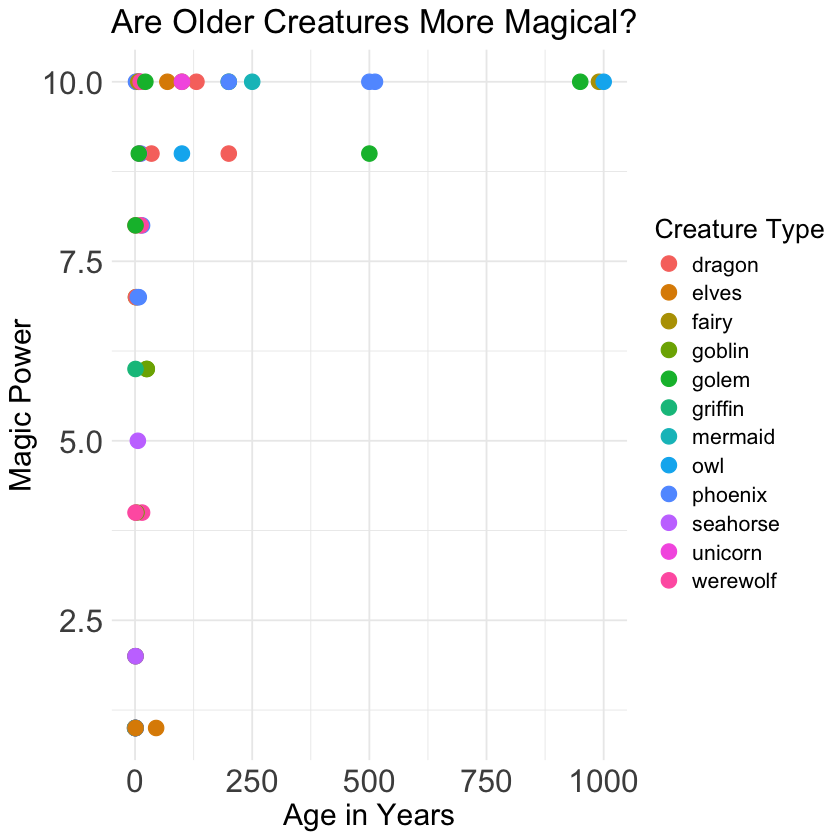

In [53]:
# Relationship between age and magic
age_magic_plot <- ggplot(creature_data, aes(x = creature_age, y = magic_power, color = creature_type)) +
  geom_point(size = 4) +
  labs(title = "Are Older Creatures More Magical?",
       x = "Age in Years", y = "Magic Power", color = "Creature Type")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(age_magic_plot)

### Question 4: What does the distribution of magic power look like?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


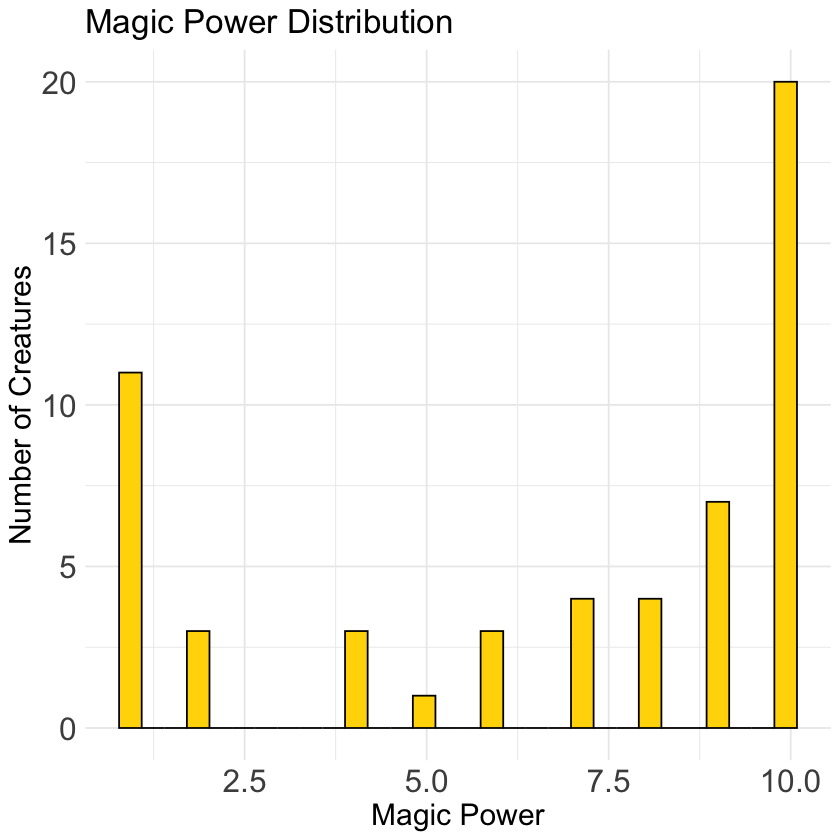

In [54]:
# Magic power distribution histogram
magic_hist <- ggplot(creature_data, aes(x = magic_power)) +
  geom_histogram(fill = "gold", color = "black") +
  labs(title = "Magic Power Distribution",
       x = "Magic Power", y = "Number of Creatures")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(magic_hist)

### Challenge Solutions:

**Challenge 1: Which element has the highest average magic power?**

In [55]:
element_magic <- creature_data %>%
  group_by(element) %>%
  summarize(average_magic = mean(magic_power), count = n()) %>%
  arrange(desc(average_magic))
print("Average magic power by element:")
print(element_magic)

[1] "Average magic power by element:"
# A tibble: 4 x 3
  element average_magic count
  <chr>           <dbl> <int>
1 fire             7.35    20
2 water            6.92    12
3 air              6.1     10
4 earth            6       14


**Challenge 2: Which three creatures have the highest magic power?**

In [56]:
top_creatures <- creature_data %>%
  arrange(desc(magic_power)) %>%
  select(creature_name, creature_type, magic_power) %>%
  head(3)
print("Top 3 most magical creatures:")
print(top_creatures)

[1] "Top 3 most magical creatures:"
  creature_name creature_type magic_power
1         alita         fairy          10
2         alita         fairy          10
3      penguino      seahorse          10


---

## Spell 8B: Team Project - Magical Pets Mystery

This project uses `magical_pets.csv` and has 5 questions.

### Setup:

In [57]:
# Load tools and data
library(dplyr)
library(ggplot2)
pets_data <- read.csv("../datasets/magical_pets.csv")
print("🔍 Evidence loaded from magical_pets.csv")
head(pets_data)

[1] "<U+0001F50D> Evidence loaded from magical_pets.csv"


,pet_name,pet_type,age_years,magic_level,favorite_treat
,<chr>,<chr>,<int>,<int>,<chr>
1,Sparkles,Unicorn,150,85,Rainbow cookies
2,Thunder,Dragon,300,95,Gold coins
3,Whiskers,Cat,3,20,Rainbow cookies
4,Flame,Phoenix,75,90,Spicy peppers
5,Bubbles,Fish,1,15,Magic algae
6,Shadow,Wolf,8,60,Moon berries


### Question 1: Which favorite treat is most popular among pets?

# A tibble: 12 x 2
   favorite_treat    count
   <chr>             <int>
 1 Rainbow cookies       7
 2 Magic algae           5
 3 Gold coins            4
 4 Sunflower seeds       3
 5 Milk drops            2
 6 Moon berries          2
 7 Spicy peppers         2
 8 Bone biscuits         1
 9 Crystal sugar         1
10 Fish                  1
11 Honeycombs            1
12 Stardust crackers     1


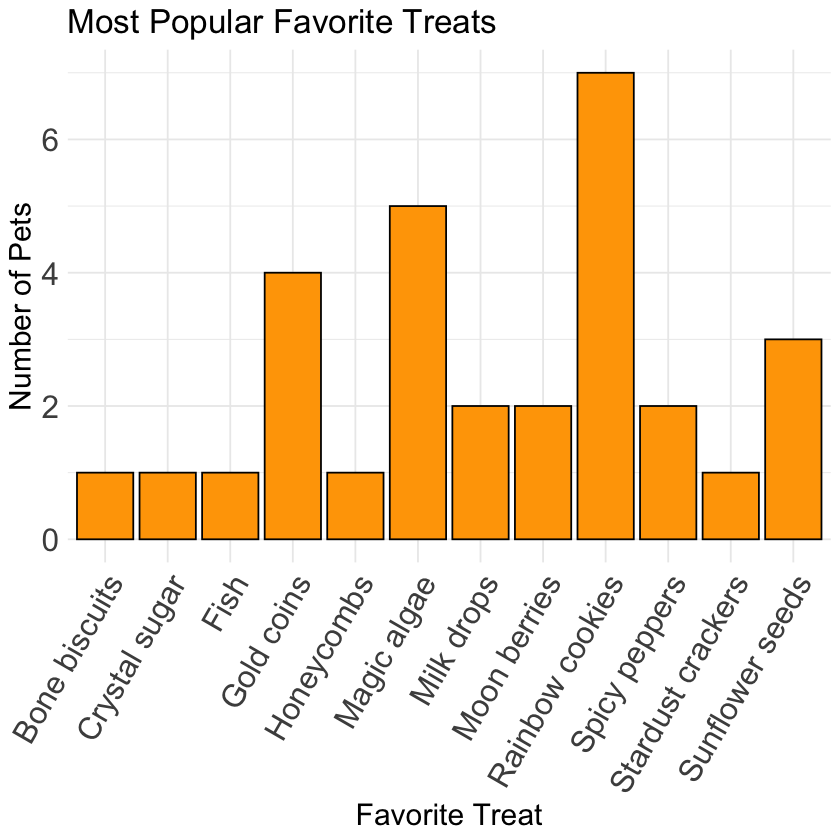

In [58]:
# Count by favorite treat
treat_counts <- pets_data %>%
  group_by(favorite_treat) %>%
  summarize(count = n()) %>%
  arrange(desc(count))
print(treat_counts)

# Bar plot to show how many pets like each treat
treat_bar <- ggplot(treat_counts, aes(x = favorite_treat, y = count)) +
  geom_col(fill = "orange", color = "black") +
  labs(title = "Most Popular Favorite Treats",
       x = "Favorite Treat", y = "Number of Pets")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(treat_bar)

### Question 2: Do pets who like that treat also tend to have higher magic levels?

# A tibble: 12 x 2
   favorite_treat    average_magic
   <chr>                     <dbl>
 1 Gold coins                 91.8
 2 Spicy peppers              91.5
 3 Honeycombs                 80  
 4 Rainbow cookies            73.9
 5 Moon berries               61  
 6 Milk drops                 52.5
 7 Crystal sugar              50  
 8 Stardust crackers          40  
 9 Magic algae                39  
10 Sunflower seeds            35  
11 Fish                       30  
12 Bone biscuits              25  


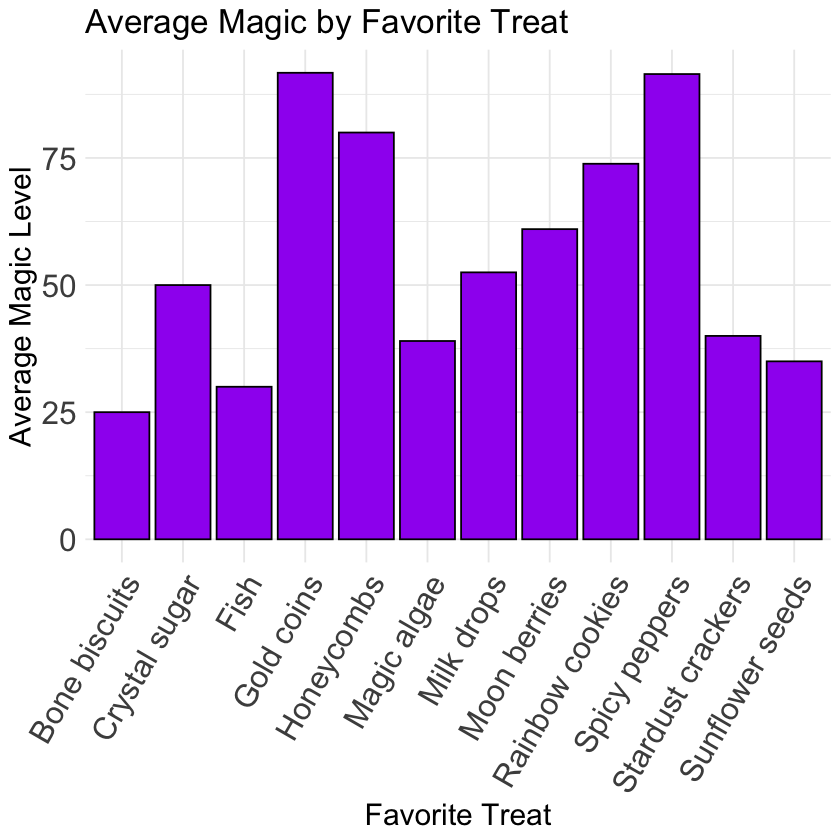

In [59]:
# Average magic by favorite treat
treat_magic <- pets_data %>%
  group_by(favorite_treat) %>%
  summarize(average_magic = mean(magic_level)) %>%
  arrange(desc(average_magic))
print(treat_magic)

treat_magic_bar <- ggplot(treat_magic, aes(x = favorite_treat, y = average_magic)) +
  geom_col(fill = "purple", color = "black") +
  labs(title = "Average Magic by Favorite Treat",
       x = "Favorite Treat", y = "Average Magic Level")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(treat_magic_bar)

### Question 3: Which pet type has the highest average magic level?

# A tibble: 11 x 3
   pet_type average_magic count
   <chr>            <dbl> <int>
 1 Dragon            91.8     4
 2 Phoenix           90.7     3
 3 Unicorn           88       4
 4 Griffin           86       2
 5 Fairy             80       1
 6 Wolf              60       3
 7 Golem             52.5     2
 8 Owl               44.3     3
 9 Dog               25       1
10 Cat               20       4
11 Fish              17.7     3


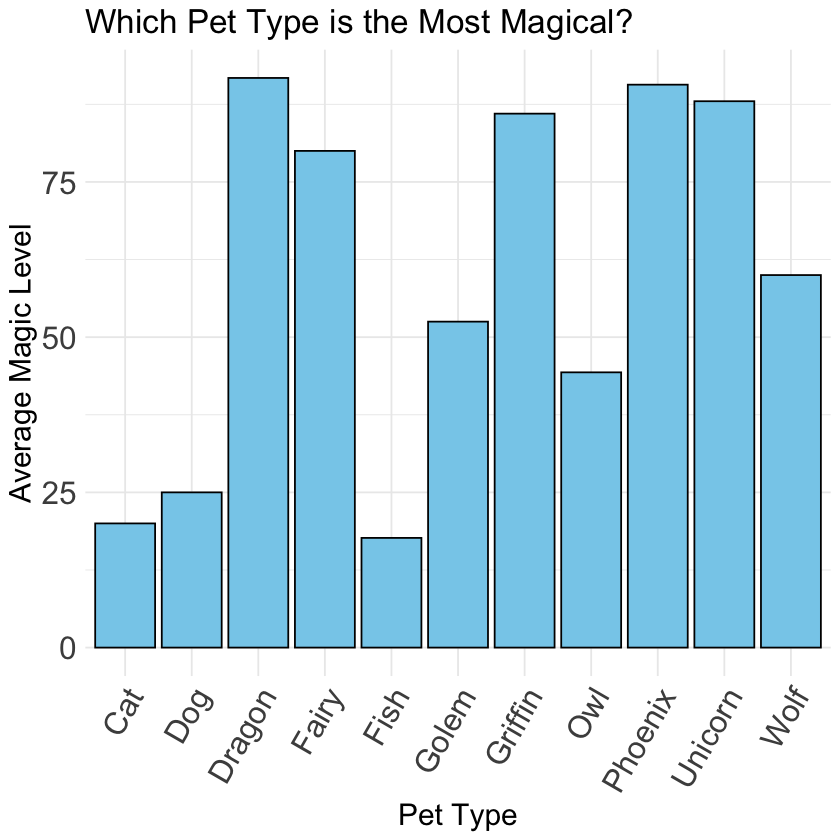

In [45]:
# Average magic by pet type
type_magic <- pets_data %>%
  group_by(pet_type) %>%
  summarize(average_magic = mean(magic_level), count = n()) %>%
  arrange(desc(average_magic))
print(type_magic)

type_magic_bar <- ggplot(type_magic, aes(x = pet_type, y = average_magic)) +
  geom_col(fill = "skyblue", color = "black") +
  labs(title = "Which Pet Type is the Most Magical?",
       x = "Pet Type", y = "Average Magic Level")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(type_magic_bar)

### Question 4: Are older pets more magical?

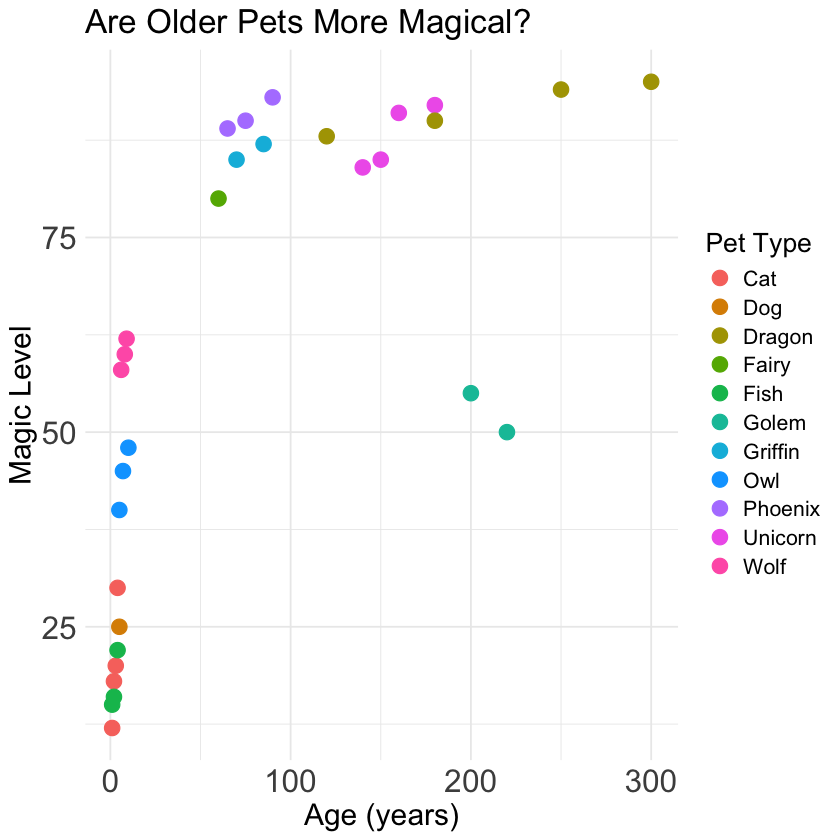

In [46]:
# Scatter plot of age vs magic level
pets_scatter <- ggplot(pets_data, aes(x = age_years, y = magic_level, color = pet_type)) +
  geom_point(size = 4) +
  labs(title = "Are Older Pets More Magical?",
       x = "Age (years)", y = "Magic Level", color = "Pet Type")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(pets_scatter)

### Question 5: What does the distribution of magic levels look like?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


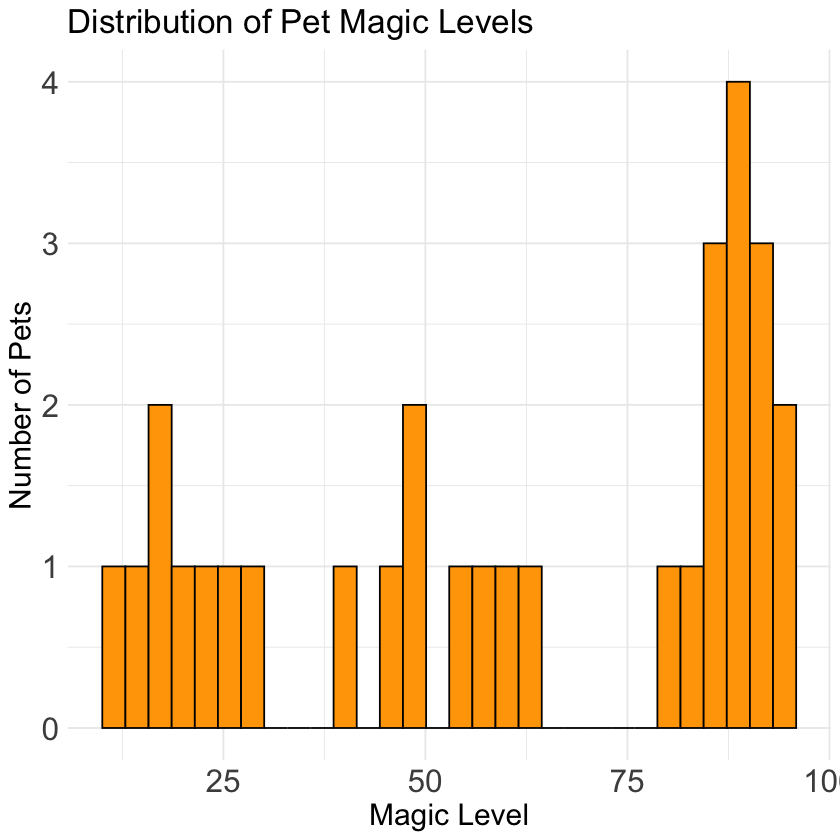

In [47]:
# Histogram of magic level distribution
pets_magic_hist <- ggplot(pets_data, aes(x = magic_level)) +
  geom_histogram(fill = "orange", color = "black") +
  labs(title = "Distribution of Pet Magic Levels",
       x = "Magic Level", y = "Number of Pets")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(pets_magic_hist)

---

## Spell 8C: Team Project - Creature Sightings Mystery

This project uses `creature_sightings.csv` and has 4 questions including the new ones added.

### Setup:

In [69]:
# Load tools and data
library(dplyr)
library(ggplot2)
creatures_data <- read.csv("../datasets/creature_sightings.csv")
print("🔍 Evidence loaded from creature_sightings.csv")
head(creatures_data)

[1] "<U+0001F50D> Evidence loaded from creature_sightings.csv"


,creature_type,location,time_of_day,weather,rarity_score,photographer_level
,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Dragon,Thunder_Mountain,Evening,Stormy,9,4
2,Unicorn,Enchanted_Forest,Dawn,Sunny,8,3
3,Fairy,Crystal_Cave,Night,Cloudy,6,2
4,Troll,Mystic_Lake,Morning,Rainy,4,1
5,Centaur,Enchanted_Forest,Afternoon,Sunny,7,3
6,Dragon,Crystal_Cave,Night,Stormy,10,5


### Question 1: Which location has the most creature sightings?

# A tibble: 6 x 2
  location         count
  <chr>            <int>
1 Crystal_Cave        10
2 Enchanted_Forest     9
3 Mystic_Lake          6
4 Thunder_Mountain     6
5 Shadow_Vale          2
6 Sunrise_Peak         1


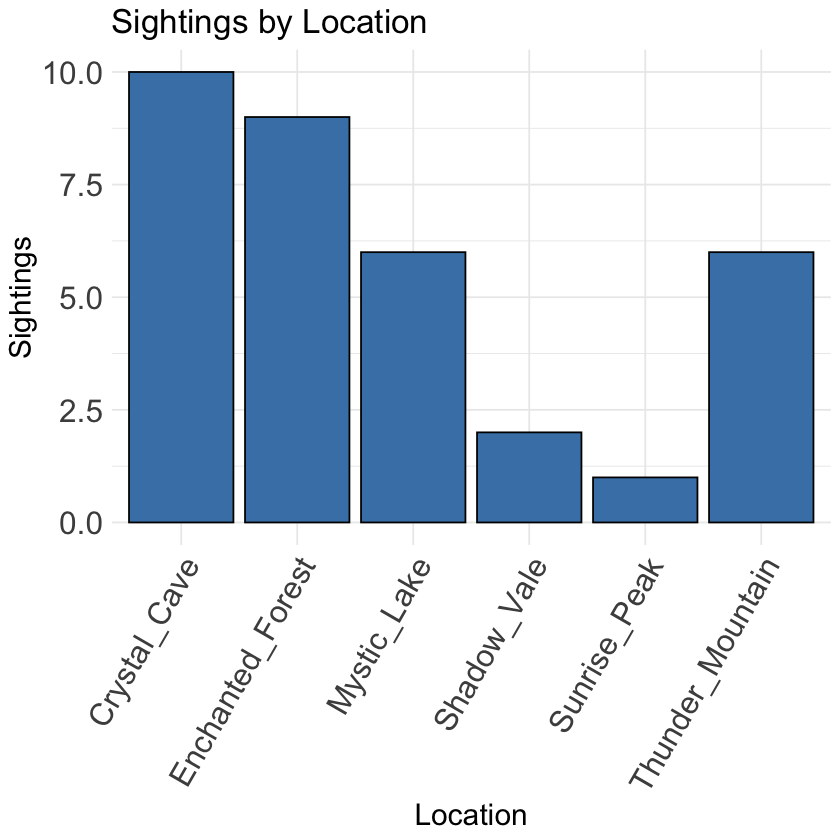

In [103]:
# Count by location
by_location <- creatures_data %>%
  group_by(location) %>%
  summarize(count = n()) %>%
  arrange(desc(count))
print(by_location)

location_plot <- ggplot(by_location, aes(x = location, y = count)) +
  geom_col(fill = "steelblue", color = "black") +
  labs(title = "Sightings by Location", x = "Location", y = "Sightings")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(location_plot)

### Question 2: What's the rarest creature type (lowest average rarity_score)?

# A tibble: 12 x 3
   creature_type average_rarity count
   <chr>                  <dbl> <int>
 1 Troll                   3.67     3
 2 Golem                   5        2
 3 Fairy                   5.5      4
 4 Sprite                  6        2
 5 Centaur                 6.67     3
 6 Mermaid                 7.5      2
 7 Werewolf                7.5      2
 8 Griffin                 7.67     3
 9 Unicorn                 8        4
10 Dragon                  9        4
11 Hydra                   9.5      2
12 Phoenix                 9.67     3


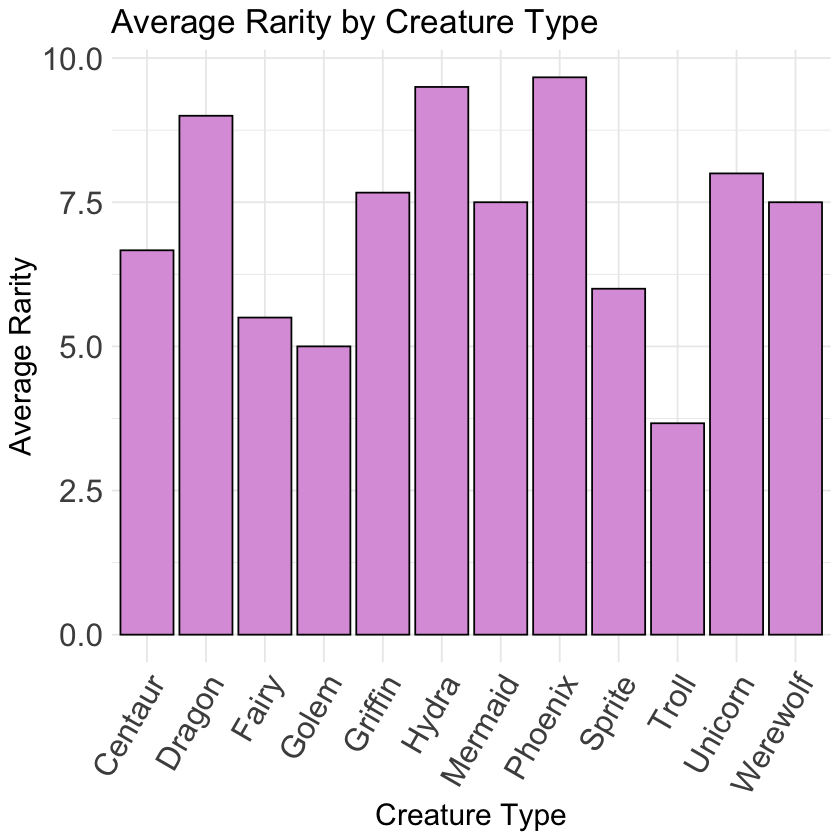

In [104]:
# Rarest creature by average rarity score
rare_by_type <- creatures_data %>%
  group_by(creature_type) %>%
  summarize(average_rarity = mean(rarity_score), count = n()) %>%
  arrange(average_rarity)
print(rare_by_type)

rare_plot <- ggplot(rare_by_type, aes(x = creature_type, y = average_rarity)) +
  geom_col(fill = "plum", color = "black") +
  labs(title = "Average Rarity by Creature Type", x = "Creature Type", y = "Average Rarity")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(rare_plot)

### Question 3: What time of the day would you most likely to encounter a creature?

# A tibble: 5 x 2
  time_of_day count
  <chr>       <int>
1 Morning         8
2 Afternoon       7
3 Evening         7
4 Night           7
5 Dawn            5


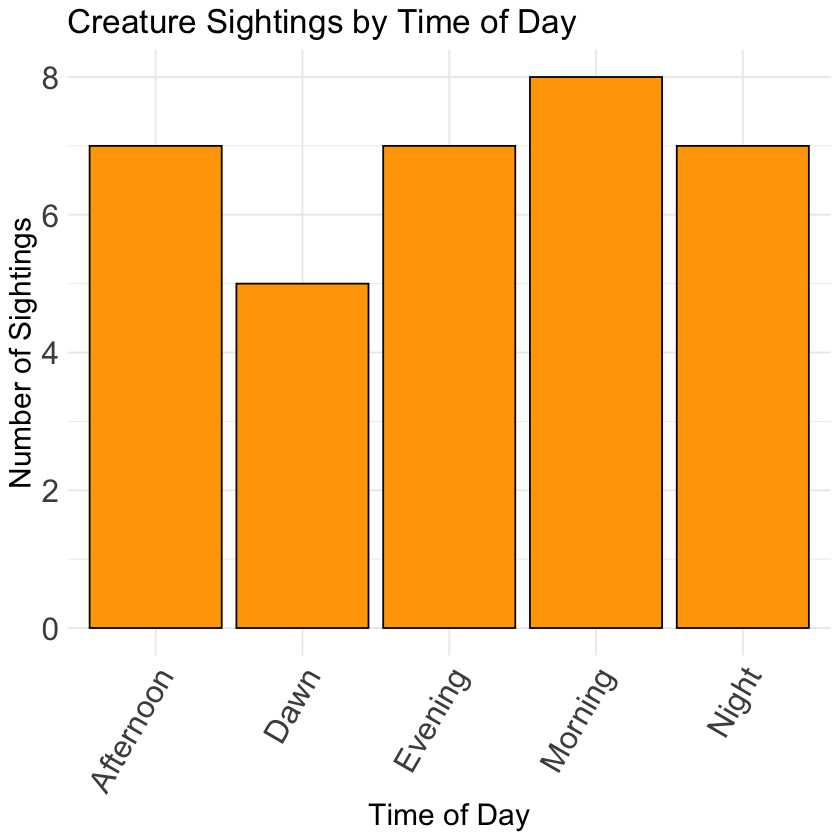

In [105]:
# Count by time of day
by_time <- creatures_data %>%
  group_by(time_of_day) %>%
  summarize(count = n()) %>%
  arrange(desc(count))
print(by_time)

time_plot <- ggplot(by_time, aes(x = time_of_day, y = count)) +
  geom_col(fill = "orange", color = "black") +
  labs(title = "Creature Sightings by Time of Day", x = "Time of Day", y = "Number of Sightings")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19),
        axis.text.x = element_text(angle = 60, hjust = 1))
print(time_plot)

### Question 4: Is there a relationship between rarity score and photographer level? (scatter plot)

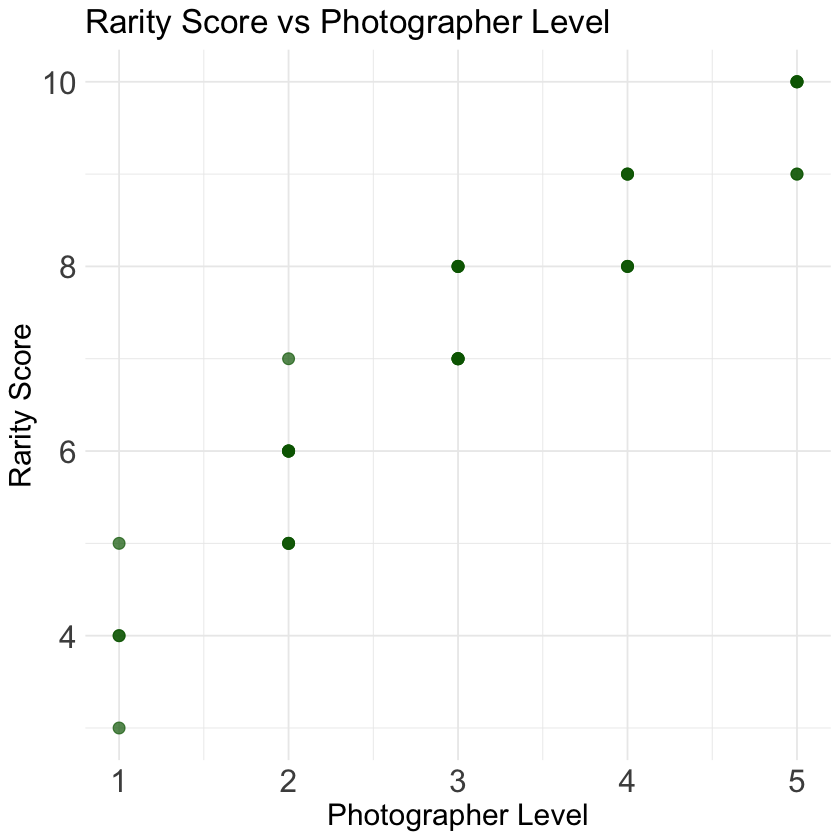

In [106]:
# Create scatter plot
scatter_plot <- ggplot(creatures_data, aes(x = photographer_level, y = rarity_score)) +
  geom_point(size = 3, color = "darkgreen", alpha = 0.7) +
  labs(title = "Rarity Score vs Photographer Level", 
       x = "Photographer Level", 
       y = "Rarity Score") +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(scatter_plot)

---

## Spell 8D: Team Project - Magic School Mystery

This project uses `magic_school_grades.csv` and has 3 questions plus a challenge, with the updated structure including 3x1 grid histograms.

### Setup:

In [29]:
# Load tools and data
library(dplyr)
library(ggplot2)
library(gridExtra)
school_data <- read.csv("../datasets/magic_school_grades.csv")
print("🔍 Evidence loaded from magic_school_grades.csv")
head(school_data)

[1] "<U+0001F50D> Evidence loaded from magic_school_grades.csv"


,student_name,house,grade,magic_score,potion_score,flying_score,has_pet
,<chr>,<chr>,<int>,<int>,<int>,<int>,<lgl>
1,Luna,Fire,2,80,90,75,TRUE
2,Max,Water,4,92,85,88,FALSE
3,Zara,Earth,2,73,95,70,TRUE
4,Finn,Air,4,90,80,92,TRUE
5,Nova,Fire,4,88,85,95,FALSE
6,Sage,Water,2,77,90,78,TRUE


### Question 1: What's the distribution of scores for each subject? (3 histograms in 3x1 grid)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."


TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]


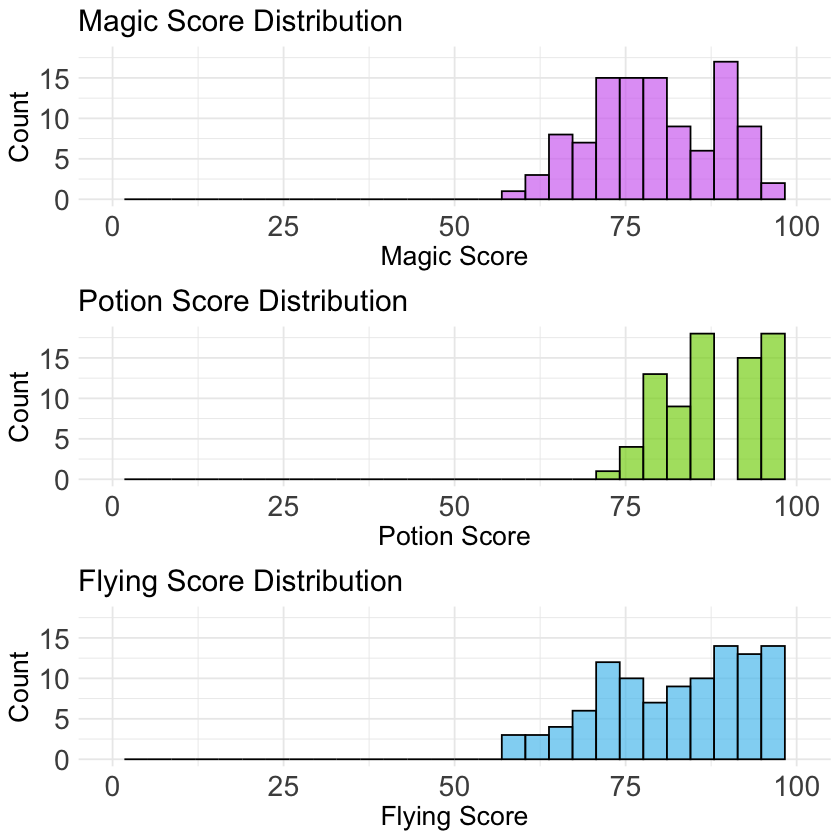

In [32]:
# Create 3 histograms stacked on top of each other
# Magic score
magic_hist <- ggplot(school_data, aes(x = magic_score)) +
  geom_histogram(fill = "#d578f2fc", color = "black", alpha = 0.7) +
  labs(title = "Magic Score Distribution", x = "Magic Score", y = "Count")+
  xlim(0, 100) +
  ylim(0, 18) +
  theme_minimal() +
  theme(text = element_text(size = 14),
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 17))

# Potion score
potion_hist <- ggplot(school_data, aes(x = potion_score)) +
  geom_histogram(fill = "#87d31d", color = "black", alpha = 0.7) +
  labs(title = "Potion Score Distribution", x = "Potion Score", y = "Count")+
  xlim(0, 100) +
  ylim(0, 18) +
  theme_minimal() +
  theme(text = element_text(size = 14),
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 17))

# Flying score
flying_hist <- ggplot(school_data, aes(x = flying_score)) +
  geom_histogram(fill = "#58c4ef", color = "black", alpha = 0.7) +
  labs(title = "Flying Score Distribution", x = "Flying Score", y = "Count")+
  xlim(0, 100) +
  ylim(0, 18) +
  theme_minimal() +
  theme(text = element_text(size = 14),
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 17))

# Arrange the three histograms in a 3x1 grid (3 rows, 1 column)
grid_plot <- grid.arrange(magic_hist, potion_hist, flying_hist, nrow = 3, ncol = 1)
print(grid_plot)

### Question 2: Do people who have a pet have better magic scores?

# A tibble: 2 x 3
  has_pet avg_magic count
  <lgl>       <dbl> <int>
1 FALSE        85.6    50
2 TRUE         73.8    57


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


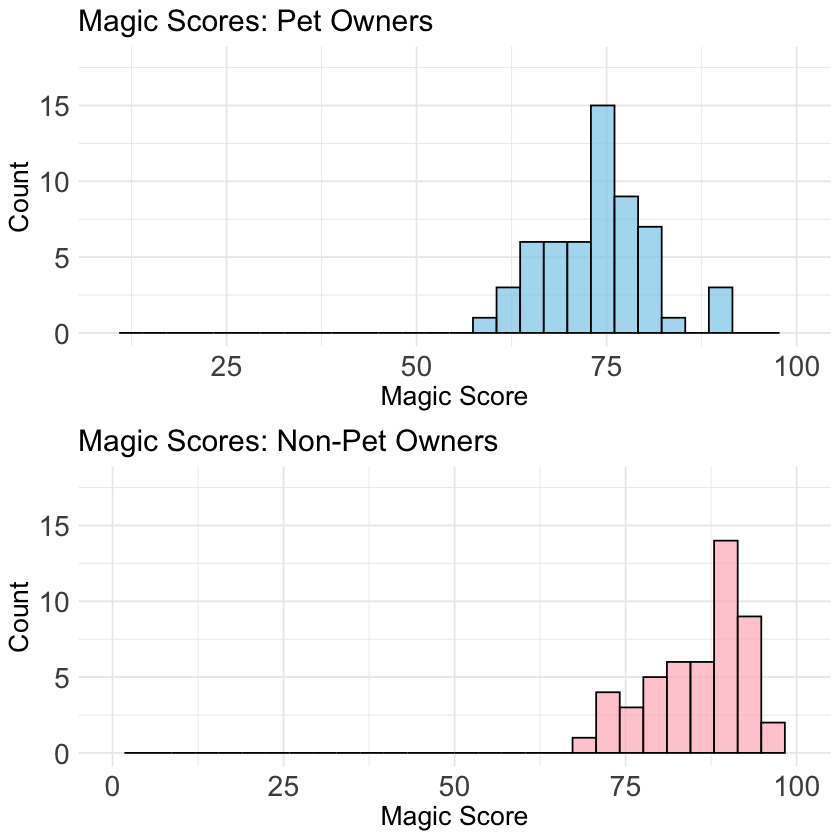

In [34]:
# Compare magic scores between pet owners and non-pet owners
pet_comparison <- school_data %>%
  group_by(has_pet) %>%
  summarize(avg_magic = mean(magic_score), count = n())
print(pet_comparison)

# Method 1: Two histograms stacked on top of each other using 2x1 grid
# Filter data for pet owners
pet_owners <- school_data %>% filter(has_pet == TRUE)
non_pet_owners <- school_data %>% filter(has_pet == FALSE)

# Histogram for pet owners
pet_hist <- ggplot(pet_owners, aes(x = magic_score)) +
  geom_histogram(fill = "#87ceeb", color = "black", alpha = 0.7) +
  labs(title = "Magic Scores: Pet Owners", x = "Magic Score", y = "Count") +
  xlim(10, 100) +
  ylim(0, 18) +
  theme_minimal() +
  theme(text = element_text(size = 14),
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 17))

# Histogram for non-pet owners
no_pet_hist <- ggplot(non_pet_owners, aes(x = magic_score)) +
  geom_histogram(fill = "#ffb6c1", color = "black", alpha = 0.7) +
  labs(title = "Magic Scores: Non-Pet Owners", x = "Magic Score", y = "Count") +
  xlim(0, 100) +
  ylim(0, 18) +
  theme_minimal() +
  theme(text = element_text(size = 14),
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 17))

# Arrange histograms in 2x1 grid
hist_grid <- grid.arrange(pet_hist, no_pet_hist, nrow = 2, ncol = 1)
print(hist_grid)


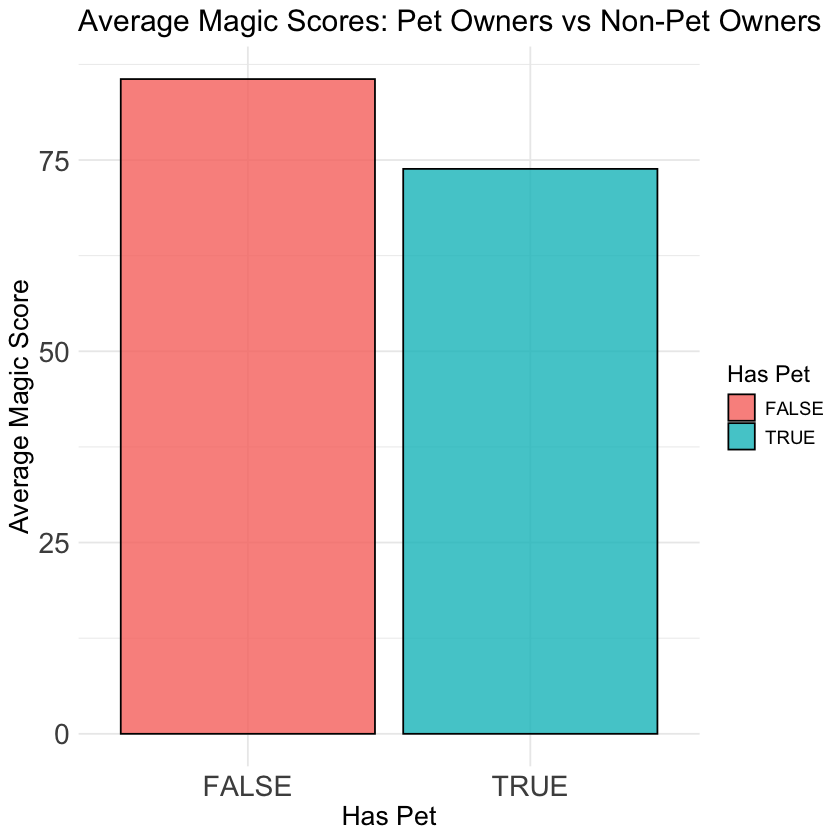

In [35]:

# Method 2: Bar plot showing average magic scores
avg_plot <- ggplot(pet_comparison, aes(x = has_pet, y = avg_magic, fill = has_pet)) +
  geom_col(color = "black", alpha = 0.8) +
  labs(title = "Average Magic Scores: Pet Owners vs Non-Pet Owners", 
       x = "Has Pet", y = "Average Magic Score", fill = "Has Pet") +
  theme_minimal() +
  theme(text = element_text(size = 14),
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 17))
print(avg_plot)

### Question 3: Is there a relationship between potion score and flying score? (scatter plot)

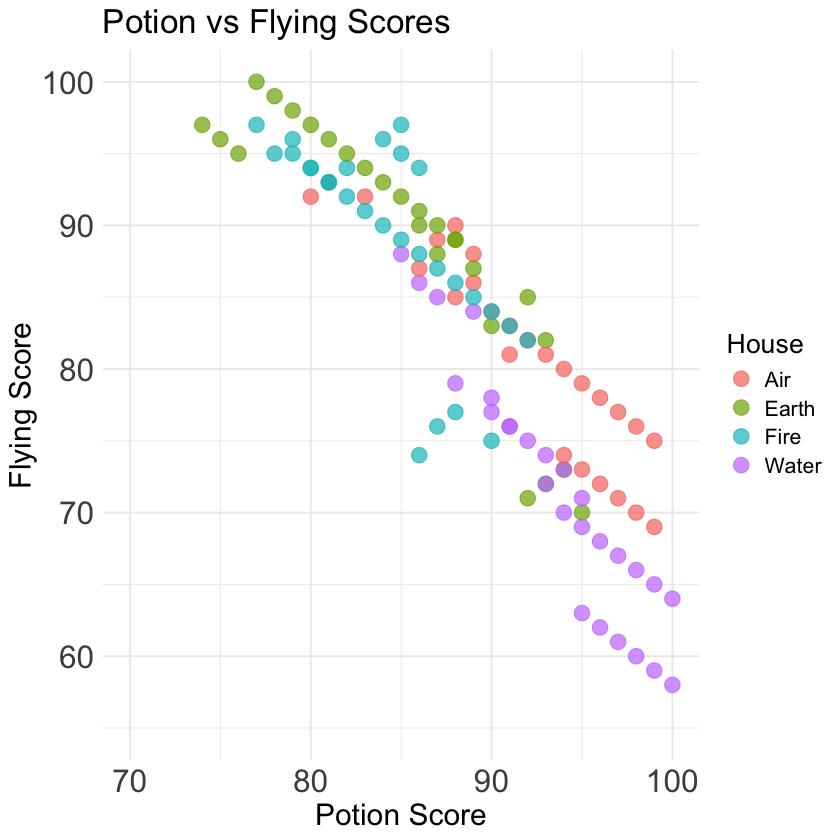

In [40]:
# Create scatter plot to see relationship
pf_scatter <- ggplot(school_data, aes(x = potion_score, y = flying_score, color = house)) +
  geom_point(size = 4, alpha = 0.7) +
  labs(title = "Potion vs Flying Scores",
       x = "Potion Score", y = "Flying Score", color = "House") +
  xlim(70, 100) +
  ylim(55, 100) +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(pf_scatter)

### Challenge: Students from which house has the best score on average?

[1] "Average overall scores by house:"
# A tibble: 4 x 3
  house avg_overall count
  <chr>       <dbl> <int>
1 Fire         87.1    28
2 Earth        84.5    26
3 Air          83.0    26
4 Water        79.4    27


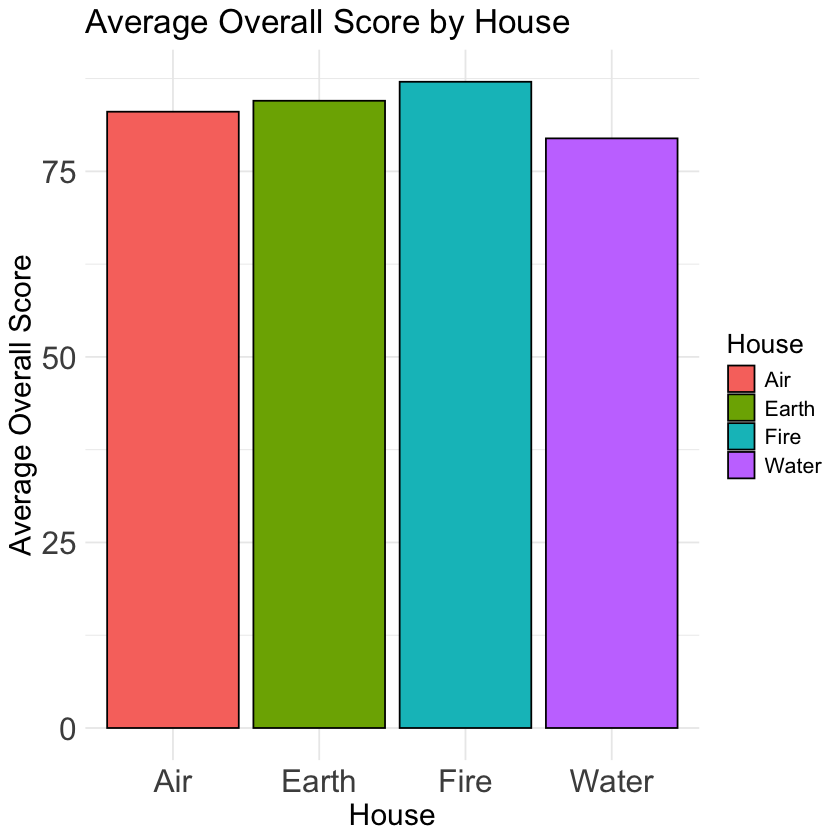

In [37]:
# Calculate overall average score for each house
house_analysis <- school_data %>%
  mutate(overall_score = (magic_score + potion_score + flying_score) / 3) %>%
  group_by(house) %>%
  summarize(avg_overall = mean(overall_score), count = n()) %>%
  arrange(desc(avg_overall))

print("Average overall scores by house:")
print(house_analysis)

# Visualize the results
house_plot <- ggplot(house_analysis, aes(x = house, y = avg_overall, fill = house)) +
  geom_col(color = "black") +
  labs(title = "Average Overall Score by House",
       x = "House", y = "Average Overall Score", fill = "House")+
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))
print(house_plot)

---

## 🎉 Congratulations!

You've completed all Day 3 spells! 
Keep practicing these magical data skills! 🔮✨